# Red neuronal que simula el comportamiento de una compuerta lógica EXNOR

Para esta primera red neuronal vamos a importar nada mas NumPy, creando la función de pérdida, los perceptrones y las capas desde cero con las herramientas que nos proporciona np. En este caso, vamos a crear una red de perceptrones multicapa con forward propagation, con 3 capas:
* La primera es la de entrada (l0)
* La segunda l1
* La tercera l2


In [ ]:
import numpy as np

La función de pérdida que usaremos será la función sigmoide:

<img src = "https://render.githubusercontent.com/render/math?math=S(x)%20=%20\frac{\mathrm{1}}{\mathrm{1}%20%2B%20e%20^%20{-x}%20}">

O definida en su derivada para el descenso de gradiente:

<img src = "https://render.githubusercontent.com/render/math?math=S(x)%20=%20x%20*%20(1%20-%20x)">


In [ ]:
def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))

Tenemos este dataset de prueba para tres entradas:

In [ ]:
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])

Nuestro array Y será el de valores reales que la red usará para ajustar su función de perdida:

In [ ]:
Y = np.array([[0],
	      [1],
	      [1],
	      [0]])

Vamos a inicializar el random con una seed para que se obtengan los mismos resultados siempre, syn0 y syn1 son las matrices de los pesos sinápticos de nuestra red.

syn0 tiene 3 filas y 4 columnas, representando las 3 entradas que tiene y las 4 salidas, por su parte syn1 tiene 4 filas y 1 columna, representando sus 4 entradas y su única salida

In [ ]:
np.random.seed(1)

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

Aquí empieza la parte del entrenamiento con 60,000 ciclos.

Nuestra primera capa (l0) es los valores de entrada, la matriz X. La segunda capa (l1) es el resultado de aplicar el producto punto de la primera capa con los pesos sinápticos syn0 y luego pasar el resultado a través de nuestra función de pérdida, de manera análoga se hace lo mismo en la tercera capa (l2) con los resultados que obtuvimos de la primera capa y los pesos de la segunda.

Después de realizar los cálculos, se tiene que estimar el error, haciendo la diferencia de los valores esperados (contenidos en la matriz Y) y los valores obtenidos de la tercera capa. Para poder hacer uso del descenso de gradiente para encontrar el mínimo local de la función, ocupamos obtener el producto punto de la primera derivada de nuestra función de pérdida y la diferencia de los valores. Posteriormente, también calculamos el error de la segunda capa, con el producto punto del error de la tercera capa y la transpuesta de la matriz de los pesos sinápticos de la segunda capa, todo esto usando la derivada de la función sigmoide para poder saber hacia donde ajustar los pesos.



In [ ]:
for j in range(60000):

    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    l2_error = Y - l2
    l2_delta = l2_error*nonlin(l2,deriv=True)

    l1_error = l2_delta.dot(syn1.T)
    

    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print(l2)

Como podemos apreciar, después de 60,000 ciclos de entrenamiento los valores obtenidos son muy parecidos a los esperados de una compuerta lógica EXNOR, cuya tabla de verdad es la siguiente:

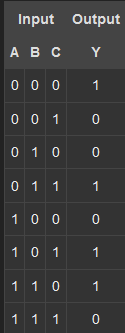


Al comparar los resultados podemos quedar satisfechos con el rendimiento de esta red neuronal extremadamente simple pero que sirve para ejemplificar una arquitectura de red, cómo funcionan las neuronas y las capas que las comunican.

| Input A | Input B | Input C | Valor Esperado | Valor Obtenido |
|---------|---------|---------|----------------|----------------|
| 0       | 0       | 1       | 0              | 0.00260572     |
| 0       | 1       | 1       | 1              | 0.99672209     |
| 1       | 0       | 1       | 1              | 0.99701711     |
| 1       | 1       | 1       | 0              | 0.00386759     |